In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/ice_cream_vs_heater.csv', parse_dates= True)

In [ ]:
df = df[(df['Month'] > '2004-09') & (df['Month'] <= '2006-05')]

In [ ]:
df.columns

Index(['Month', 'heater', 'ice cream'], dtype='object')

In [ ]:
df.head(10)

,Month,heater,ice cream
9,2004-10,20,15
10,2004-11,24,15
11,2004-12,29,14
12,2005-01,27,15
13,2005-02,17,15
14,2005-03,15,17
15,2005-04,14,19
16,2005-05,13,22
17,2005-06,13,28
18,2005-07,12,29


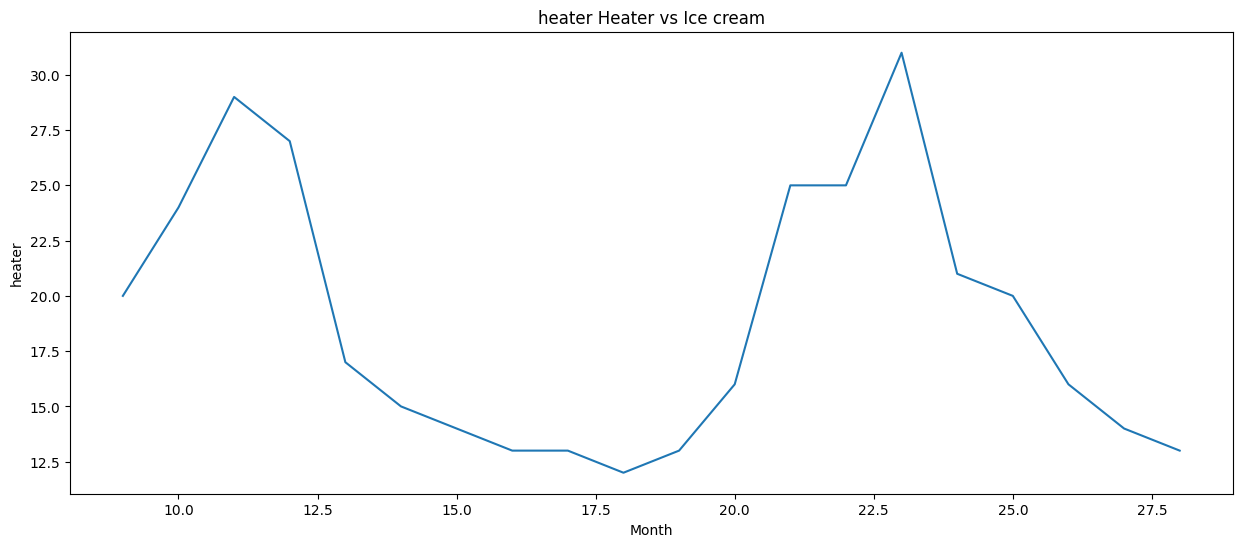

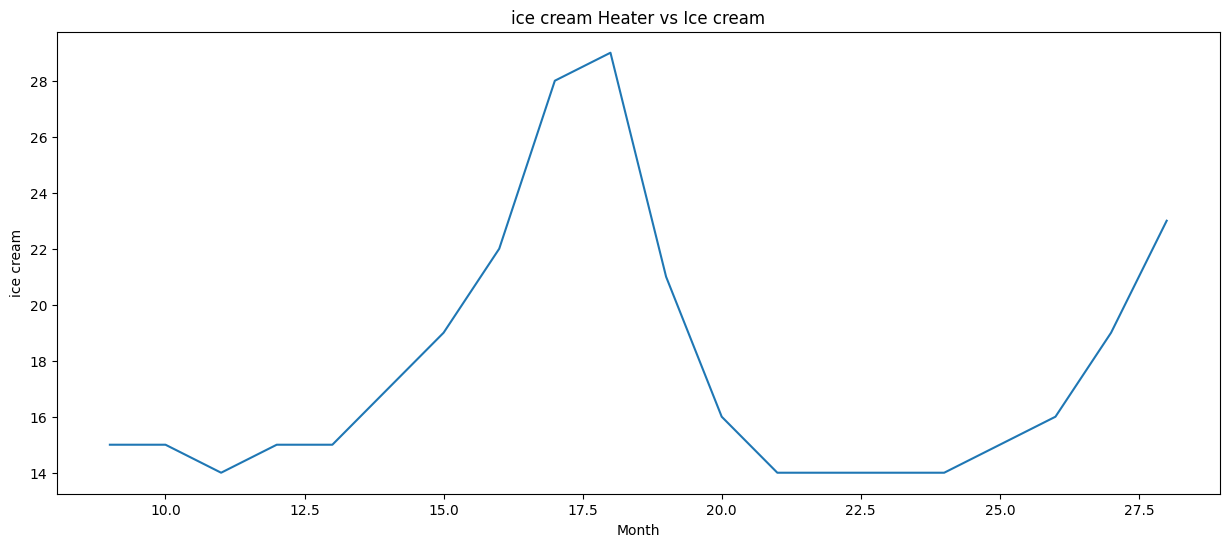

In [ ]:
for c in df[['heater', 'ice cream']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Month")
    plt.ylabel(c)
    plt.title(f"{str(c)} Heater vs Ice cream")
    plt.show()

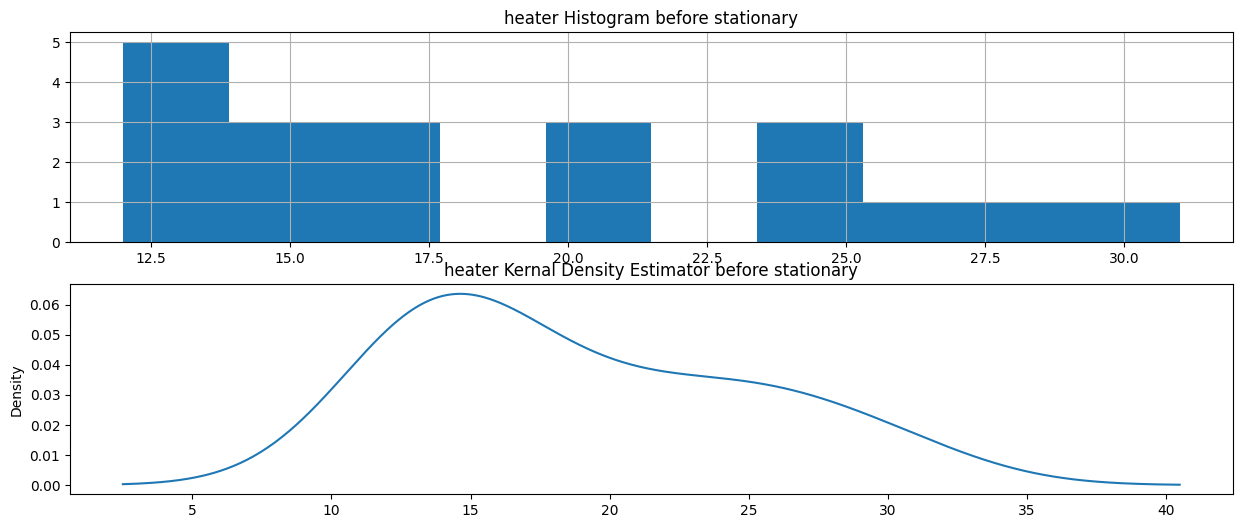

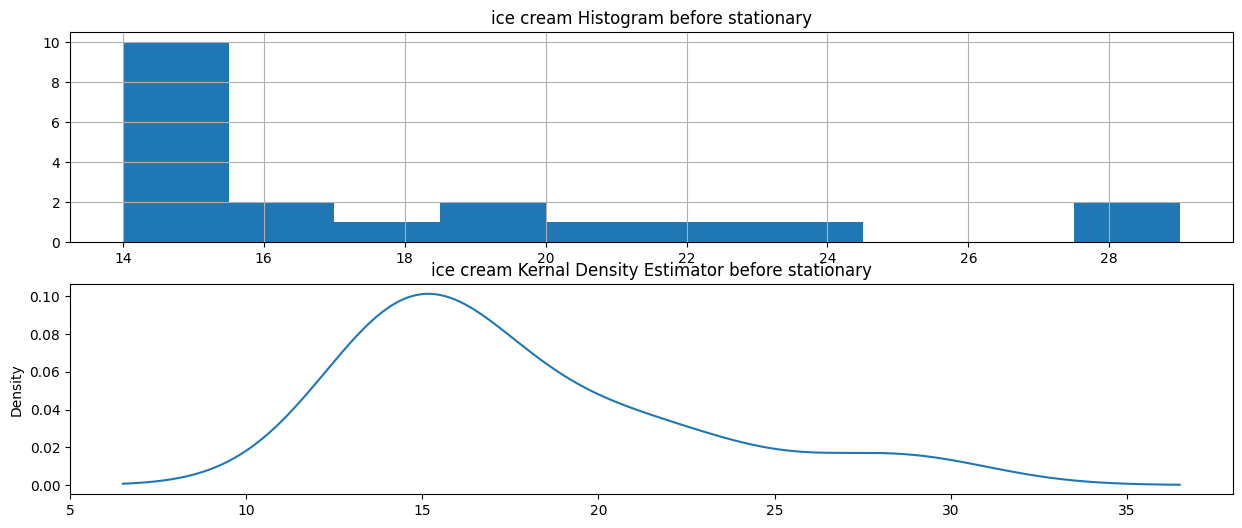

In [ ]:
for c in df[['heater', 'ice cream']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
for name, column in df[['heater', 'ice cream']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: heater
Test Statistic                 -1.458604
p-value                         0.553881
No Lags Used                    8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ice cream
Test Statistic                 -1.632792
p-value                         0.466030
No Lags Used                    8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary




In [ ]:
X = df[['heater', 'ice cream' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for name, column in train_diff[['heater', 'ice cream']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: heater
Test Statistic                  -5.105082
p-value                          0.000014
No Lags Used                    13.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: ice cream
Test Statistic                  -3.226194
p-value                          0.018518
No Lags Used                    12.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




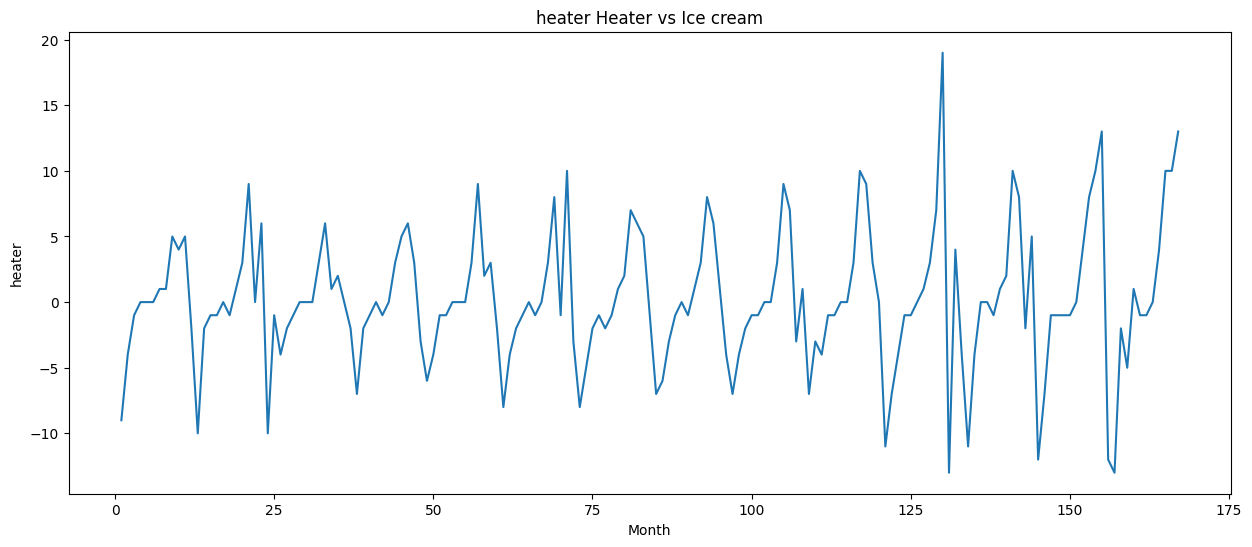

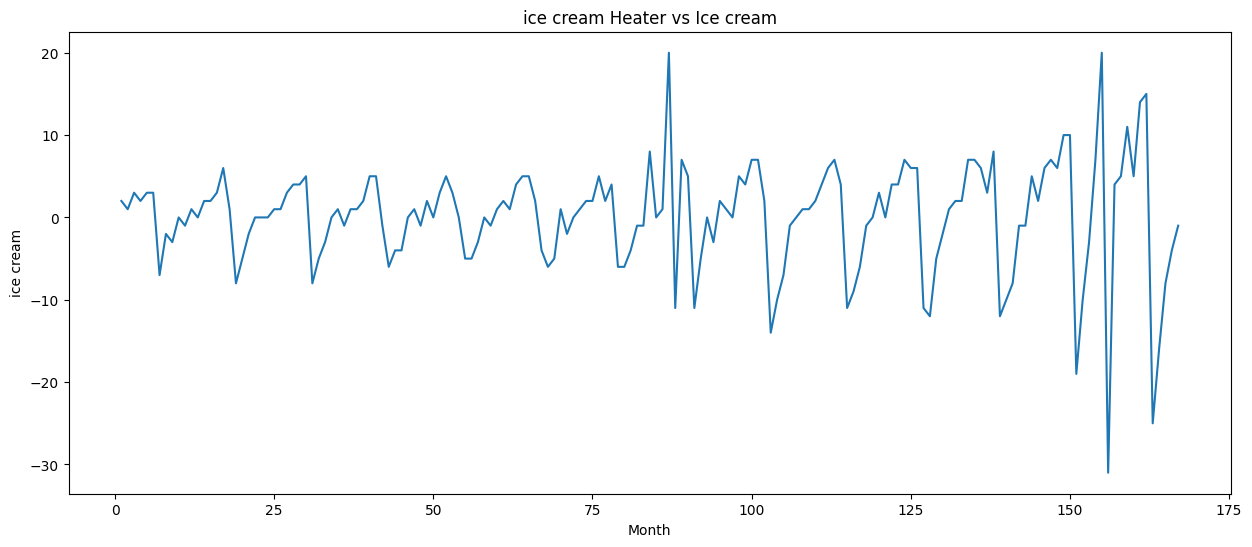

In [ ]:
for c in train_diff[['heater', 'ice cream']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Month")
    plt.ylabel(c)
    plt.title(f"{str(c)} Heater vs Ice cream")
    plt.show()

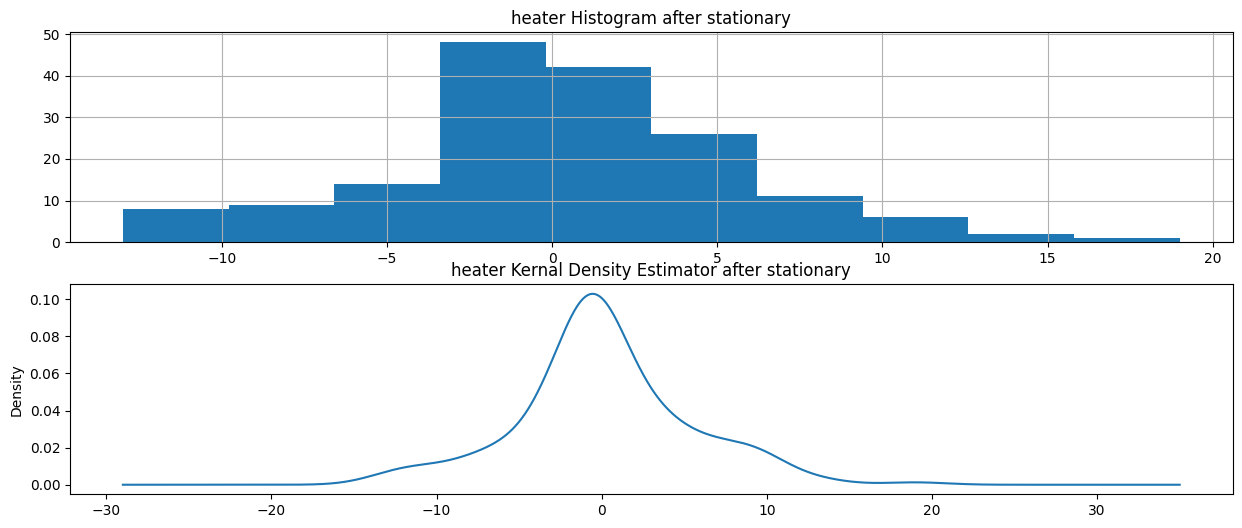

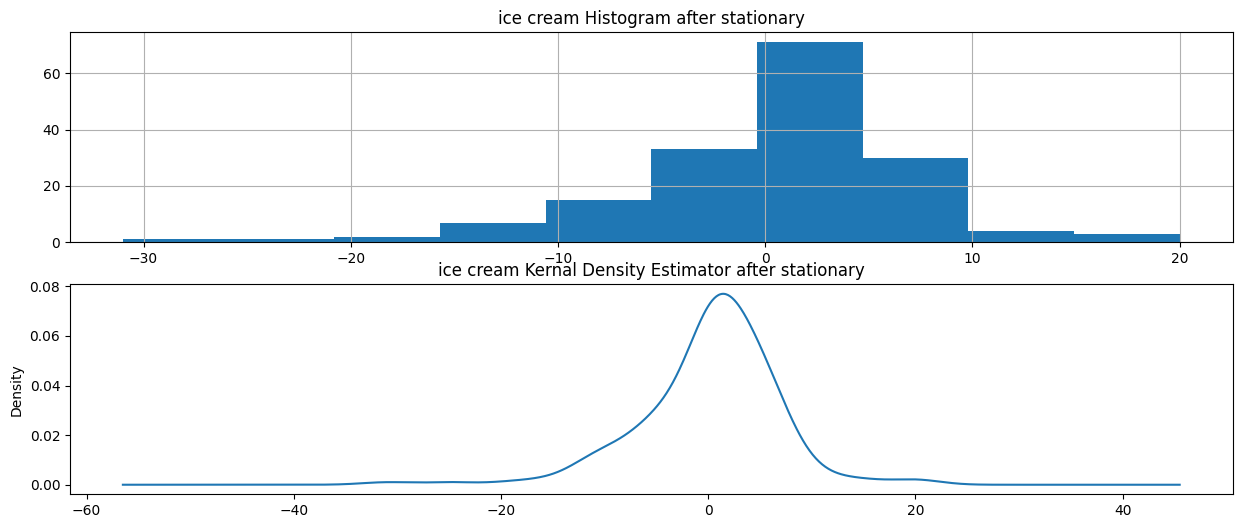

In [ ]:
for c in train_diff[['heater', 'ice cream']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,heater,ice cream
1,-9.0,2.0
2,-4.0,1.0
3,-1.0,3.0
4,0.0,2.0
5,0.0,3.0
6,0.0,3.0
7,1.0,-7.0
8,1.0,-2.0
9,5.0,-3.0
10,4.0,0.0


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df):
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]] #Critical values (90%, 95%, 99%) for trace statistic.
    def adjust(val, length= 6):
        return str(val).ljust(length) #string left justified (ljust)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train_diff[['heater', 'ice cream']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
heater >  227.6     > 12.3212   =>   True
ice cream >  73.24     > 4.1296    =>   True


In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  6.80014157598582, BIC: 6.91262306231196
Order : 2, AIC:  6.704832687622487, BIC: 6.8930718072528245
Order : 3, AIC:  6.522822282970299, BIC: 6.787445026808951
Order : 4, AIC:  6.0983540316297065, BIC: 6.4399951580991655
Order : 5, AIC:  5.777051820450966, BIC: 6.1963550264701786
Order : 6, AIC:  5.444994678191652, BIC: 5.942612774400322
Order : 7, AIC:  5.398655213741296, BIC: 5.975250304097639
Order : 8, AIC:  5.251406730862433, BIC: 5.907650396746005
Order : 9, AIC:  5.180967360998225, BIC: 5.917540849954078


In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
results = model.fit(9)
display(results.summary())
z = results.forecast(y=train_diff[['heater', 'ice cream' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['heater', 'ice cream'])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Nov, 2023
Time:                     06:11:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.91754
Nobs:                     158.000    HQIC:                   5.48010
Log likelihood:          -819.681    FPE:                    178.271
AIC:                      5.18097    Det(Omega_mle):         142.053
--------------------------------------------------------------------
Results for equation heater
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.392286         0.243851            1.609           0.108
L1.heater           -0.557496         0.082413           -6.765           0.000
L1.ice cream        -0.041348         0.053312           -0.776

In [ ]:
df_pred["new_index"] = range(200, 230)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

,heater,ice cream
new_index,,
200,-4.977240,4.223757
201,-11.705050,5.743509
202,-9.790421,1.612196
203,-9.160343,5.152872
204,-3.852822,8.066143
205,1.232253,14.254606
206,1.652168,4.333494
207,0.638007,-8.767597
208,4.425681,-14.916965


In [ ]:
res = inverse_diff(df[['heater', 'ice cream' ]],df_pred)

In [ ]:
res

,heater,ice cream,heater_1st_inv_diff,ice cream_1st_inv_diff
new_index,,,,
200,-4.977240,4.223757,19.022760,78.223757
201,-11.705050,5.743509,7.317711,83.967267
202,-9.790421,1.612196,-2.472710,85.579463
203,-9.160343,5.152872,-11.633053,90.732335
204,-3.852822,8.066143,-15.485875,98.798478
205,1.232253,14.254606,-14.253622,113.053084
206,1.652168,4.333494,-12.601454,117.386578
207,0.638007,-8.767597,-11.963447,108.618980
208,4.425681,-14.916965,-7.537766,93.702015


In [ ]:
for i in ['heater', 'ice cream' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for heater
MSE is : 1089.5285872258091
MAE is : 32.44945950798953
RMSE is : 33.00800792574143
MAPE is : 114.75285238219254
R2 is : -7.295902948419865

Evaluation metric for ice cream
MSE is : 1521.692323481692
MAE is : 38.50772485566004
RMSE is : 39.00887493227268
MAPE is : 78.04891437250731
R2 is : -4.001252907336955



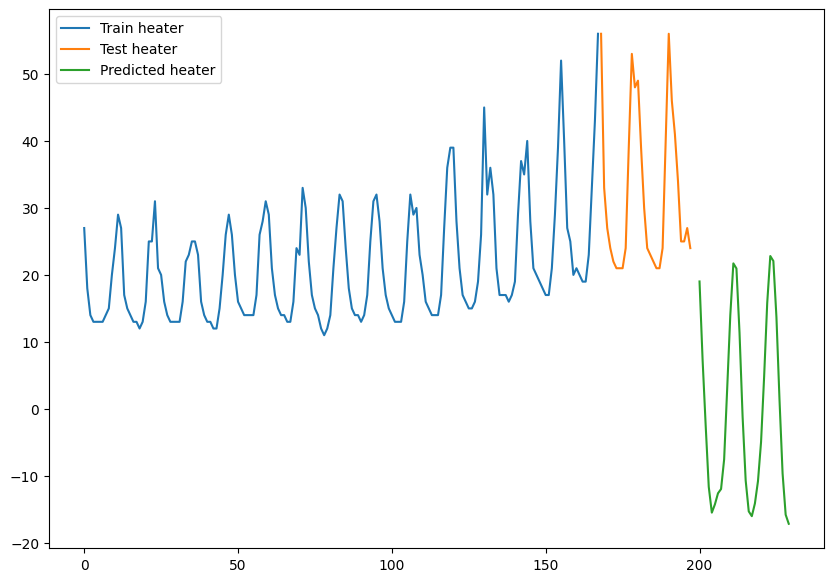

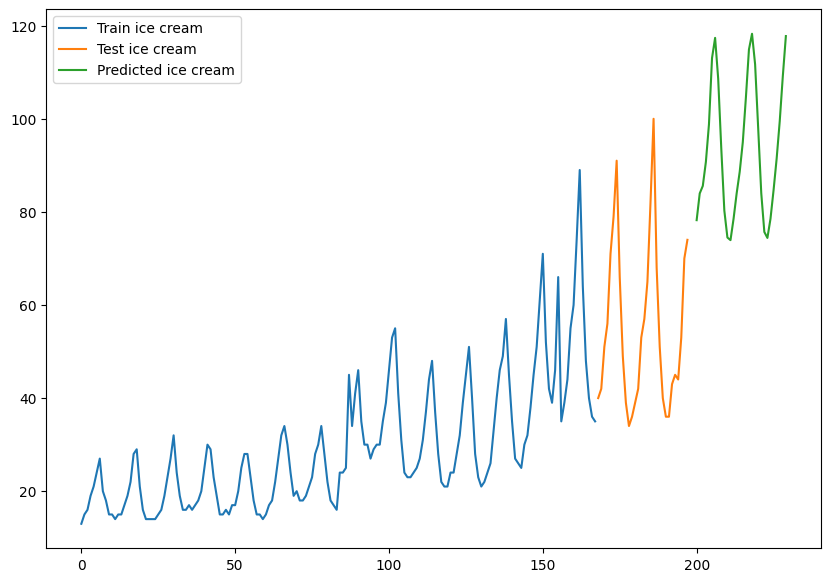

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['heater', 'ice cream']:

    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()